### 1. Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

### 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Renaming the columns so they follow the PE8 (snake case).

In [3]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [6]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [7]:
print(data.dtypes)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### 3. What should we do with the customer_id column?

In [8]:
#first I check if there are any missing customer ids or duplicates.

data.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
duplicate_ids = data.duplicated(subset='customer', keep=False)
duplicate_ids_count = duplicate_ids.sum()

duplicate_ids_count

0

#### <font color=green>There are no dups or nulls in customer id col but I will keep it, becasue it might be helpful in segmentation/bining data</font>


### 4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:

In [10]:
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = np.object)

In [11]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

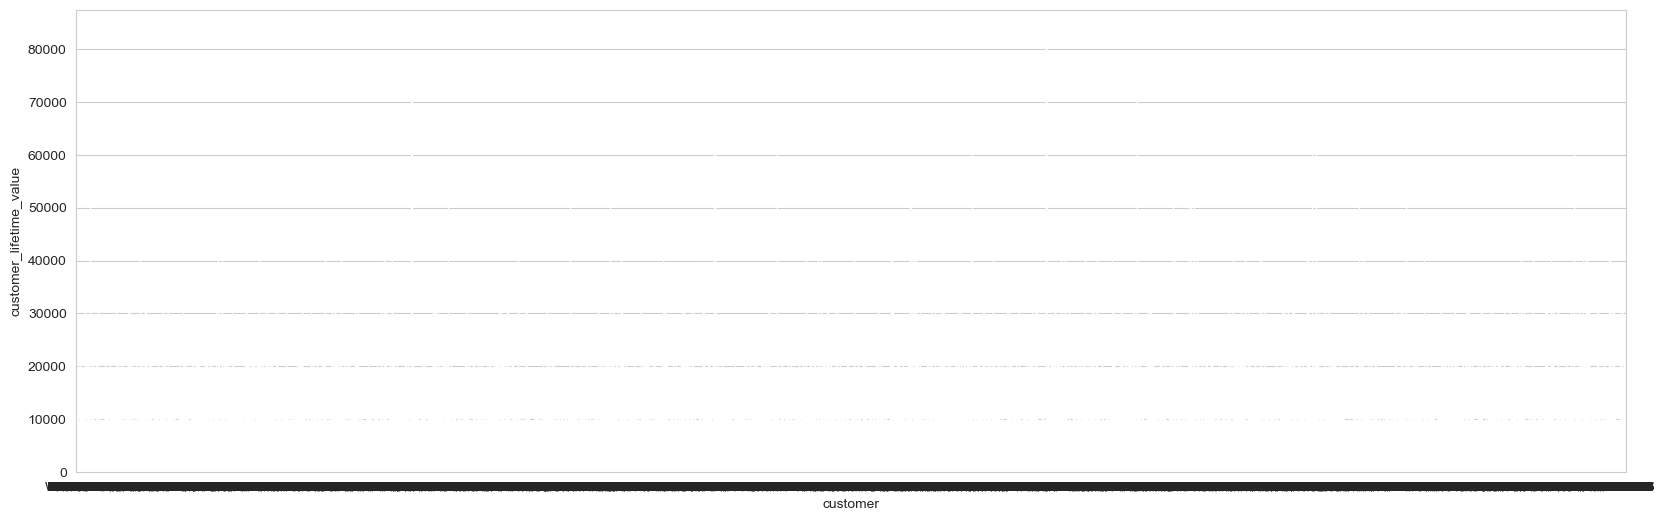

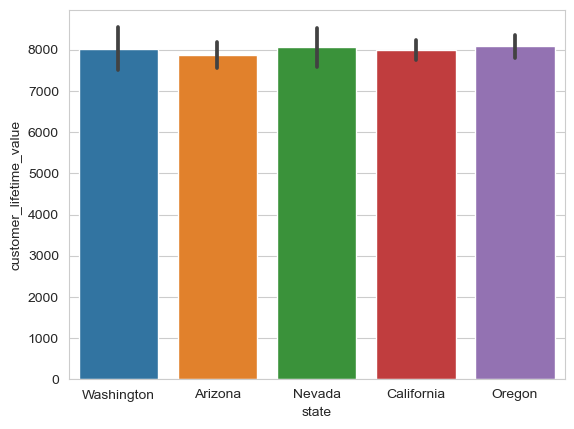

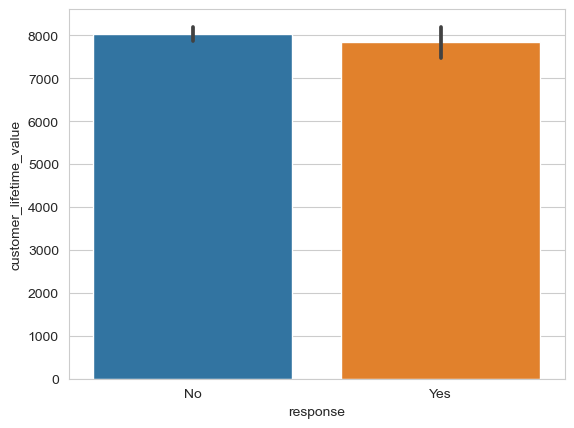

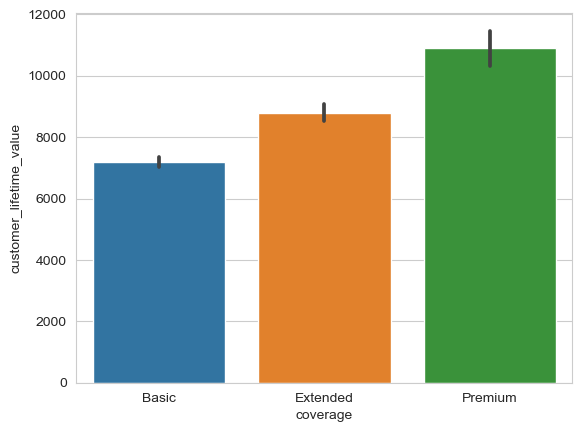

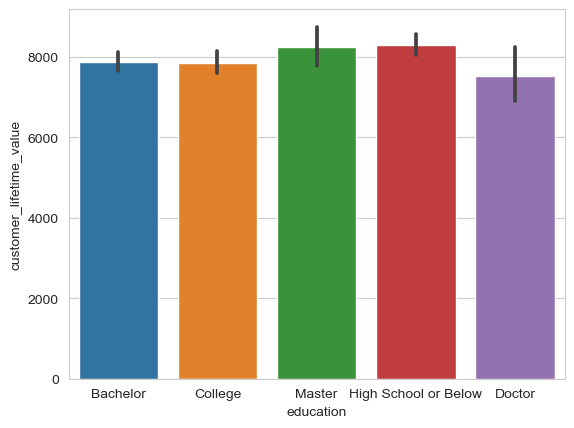

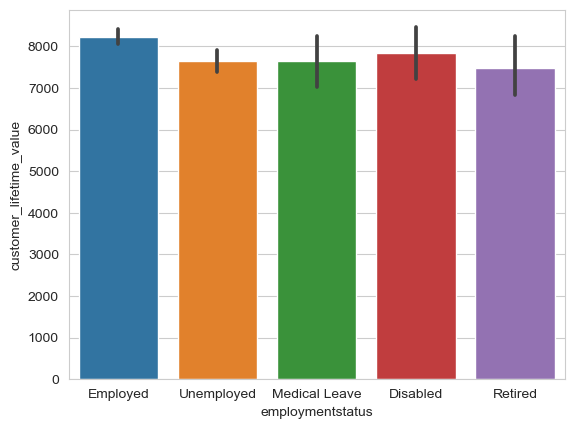

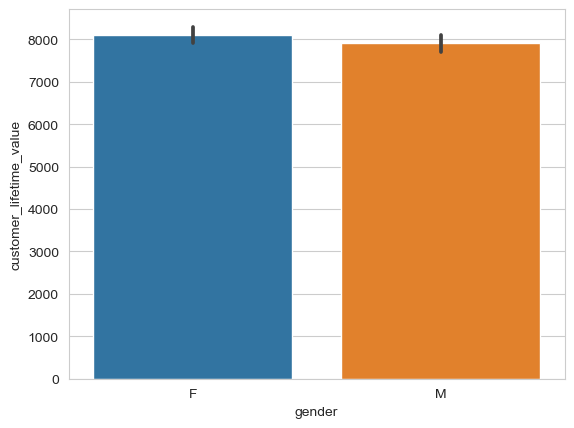

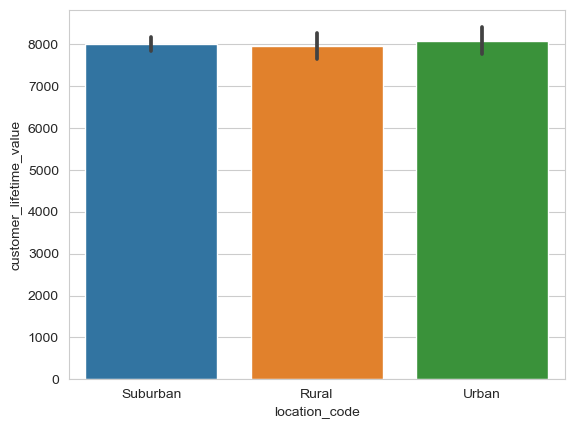

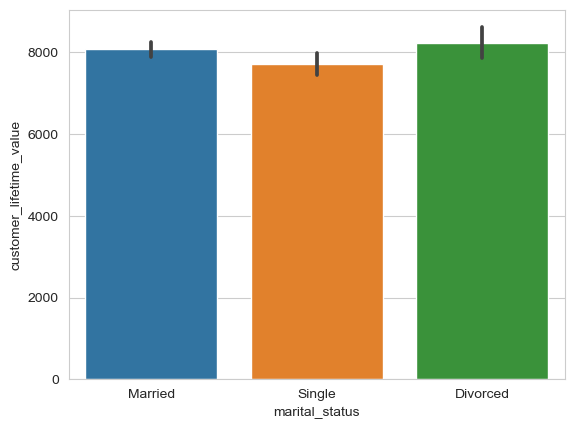

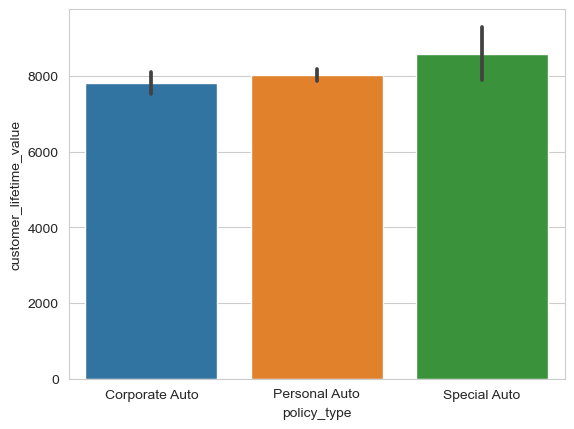

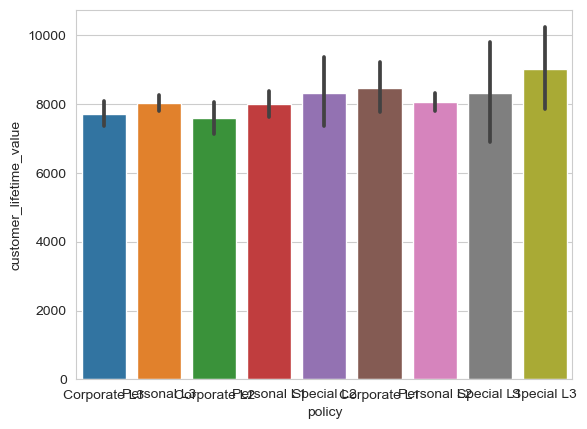

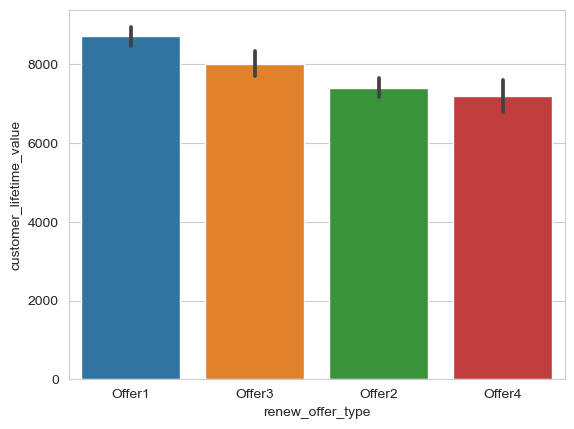

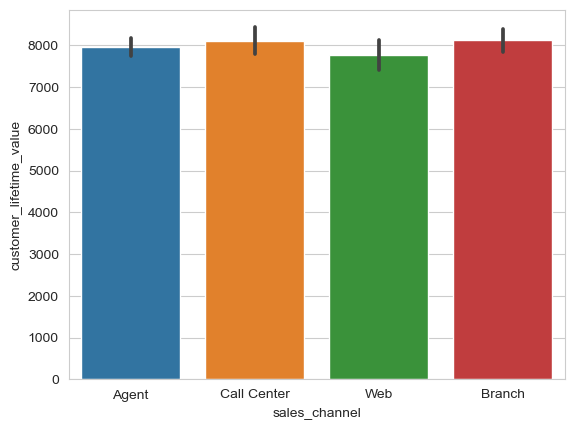

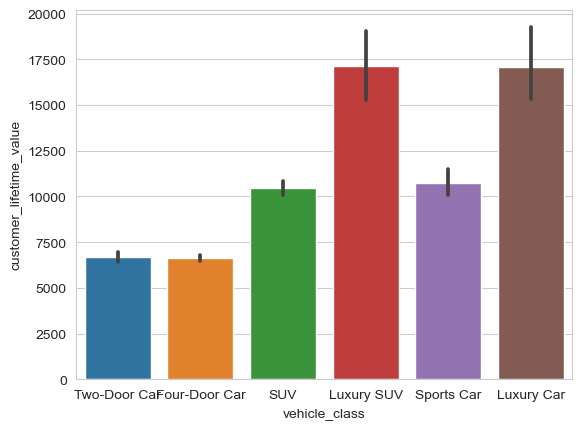

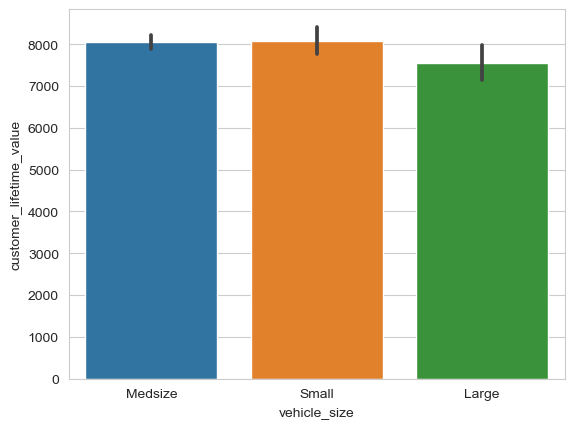

In [12]:
#let's assume customer lifetime value is our target.

plt.figure(figsize=(20, 6)) 


for col in categorical.columns:
    sns.barplot(x=col, y='customer_lifetime_value', data=data)
    plt.show()

**state, response**: It doesn't affect the customer lifetime value significantly. So we can drop them.
**coverage**: Logically customers with premium or extended coverage have higher customer lifetime value.
**education, employment, gender, location code, marital status, sales channel, vehicle size** : not a highe correlation with customer lifetime value. we can drop them.
**Policy type, policy, renew offer type, vehicle class**: They have some level of correlation with customer lifetime value so we'll keep them.


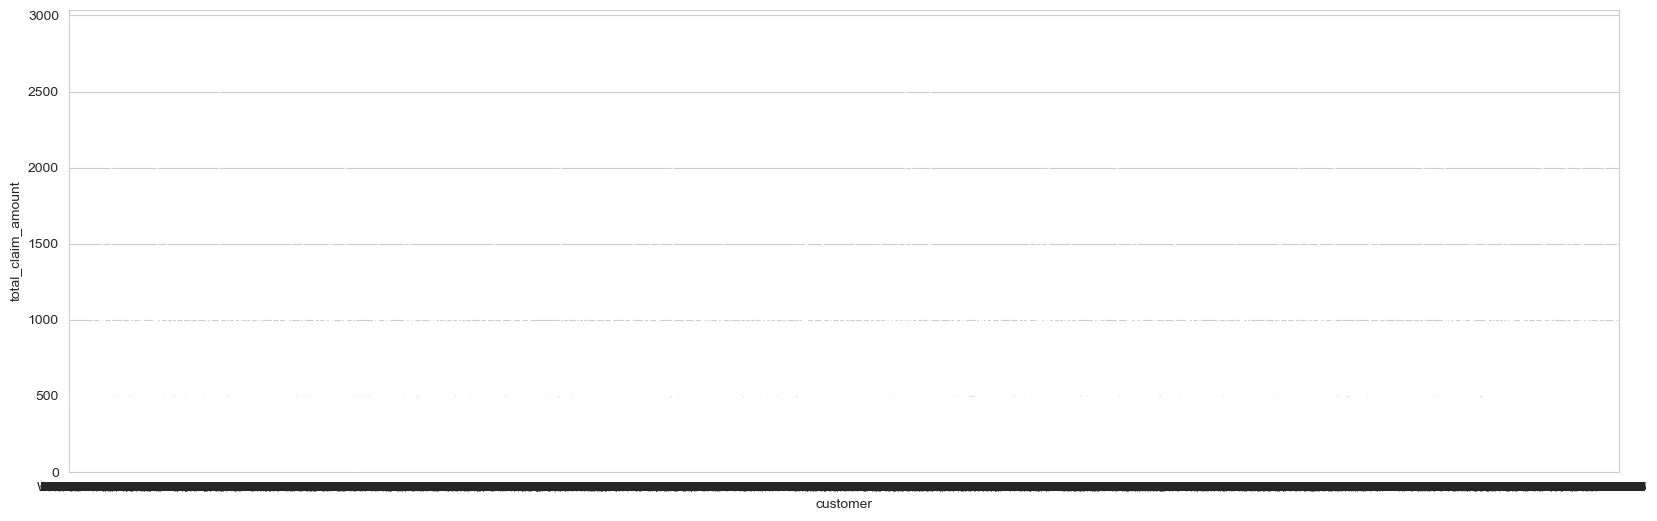

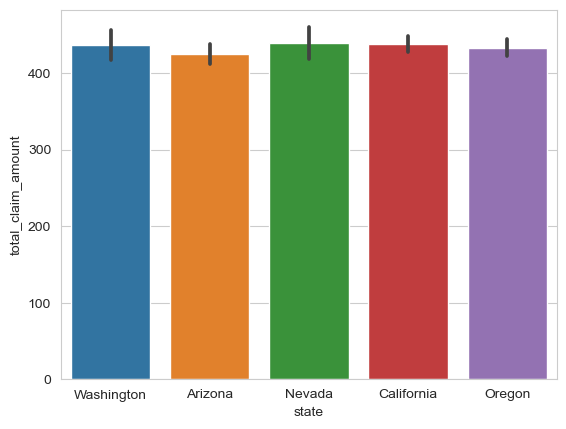

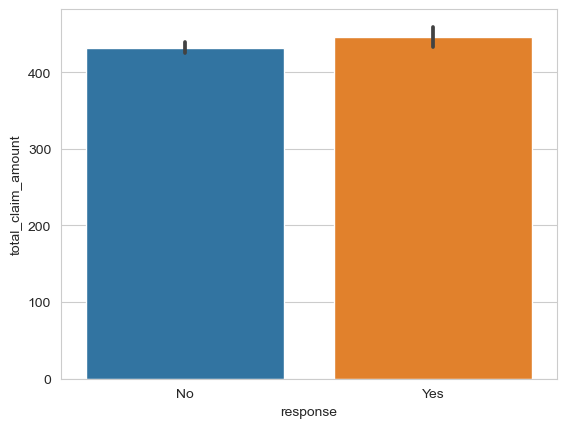

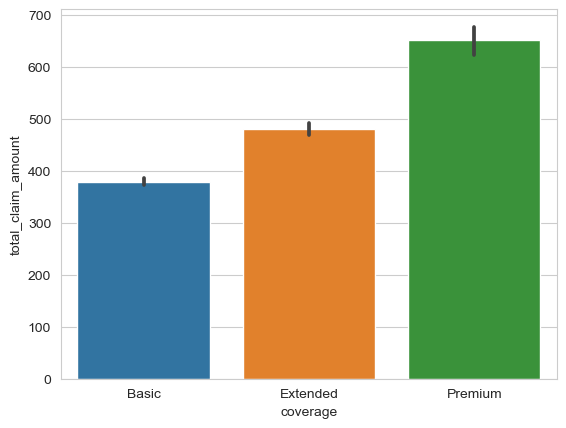

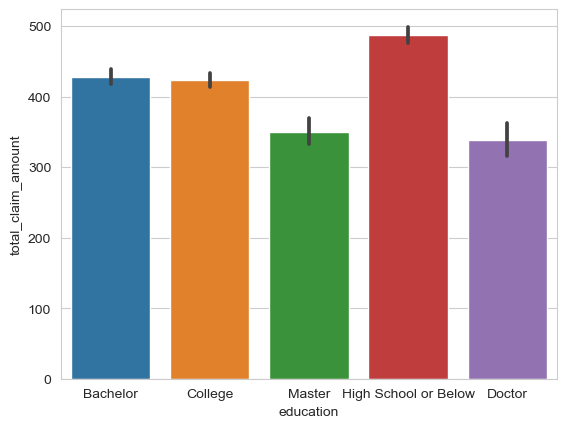

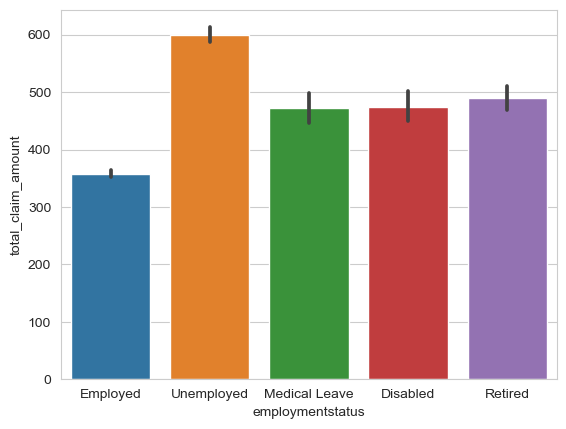

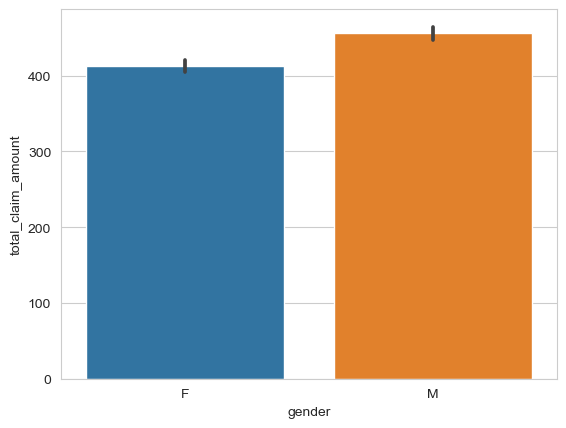

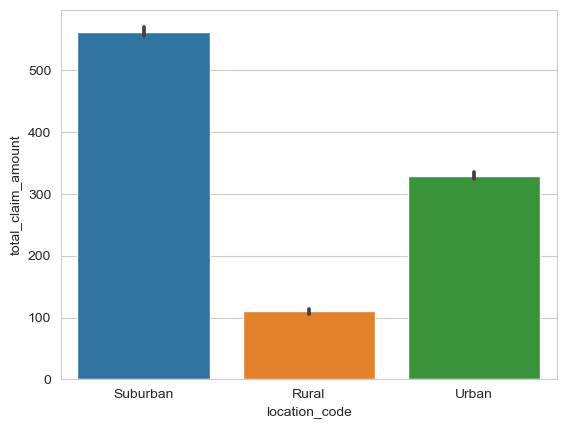

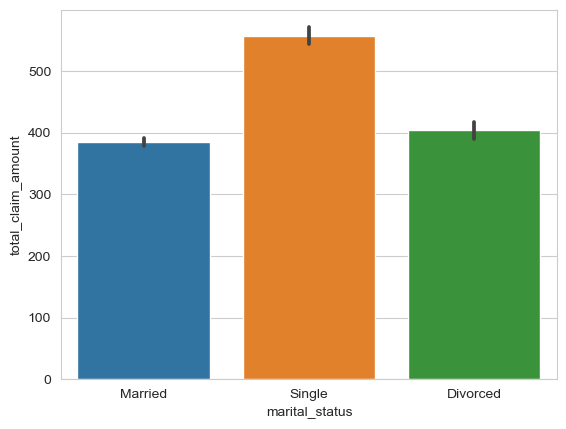

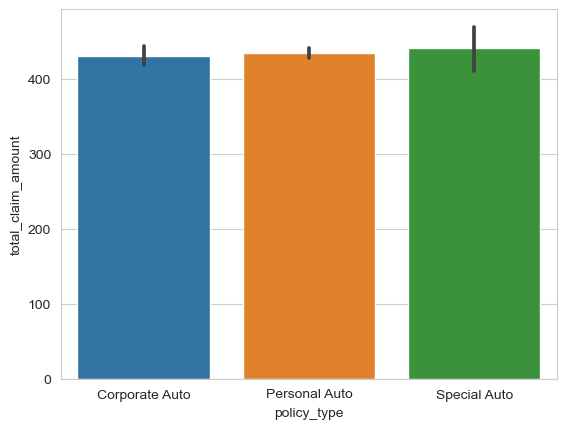

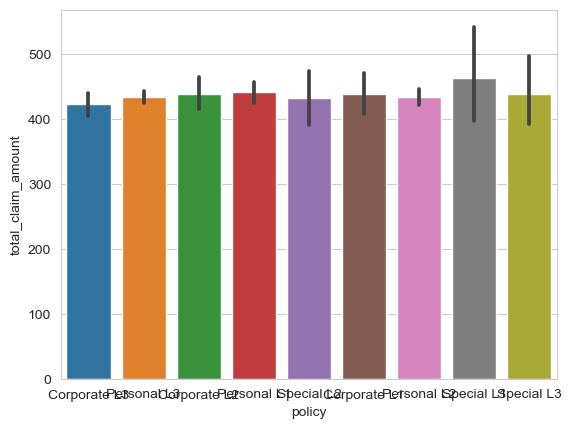

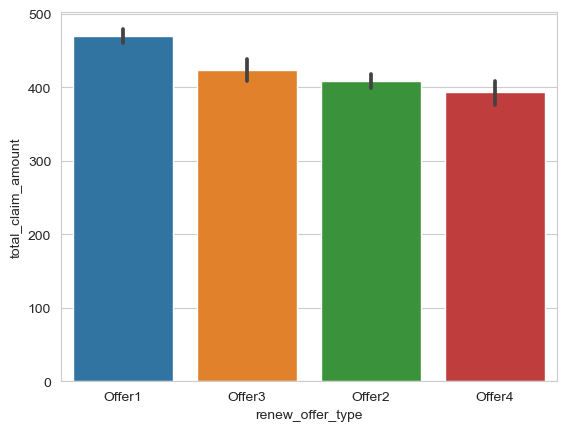

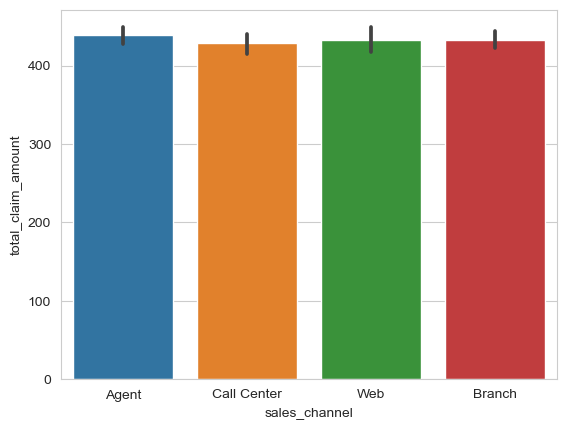

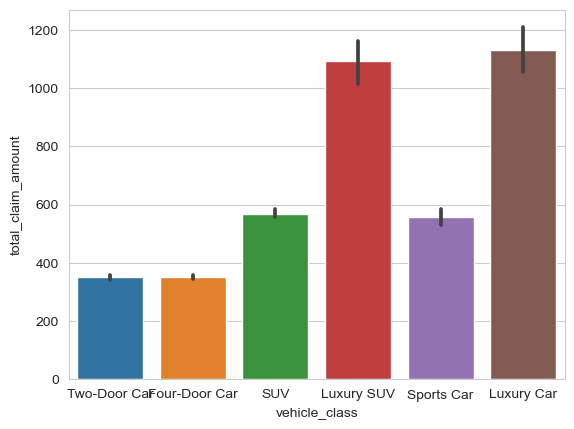

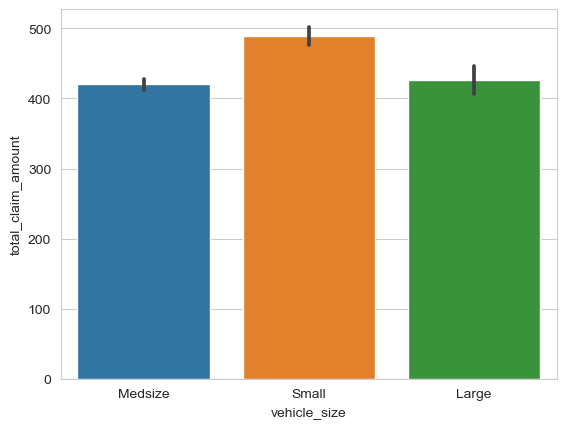

In [13]:
#let's see how it is like to have total_claim_amount as our target.

plt.figure(figsize=(20, 6)) 

for col in categorical.columns:
    sns.barplot(x=col, y='total_claim_amount', data=data)
    plt.show()

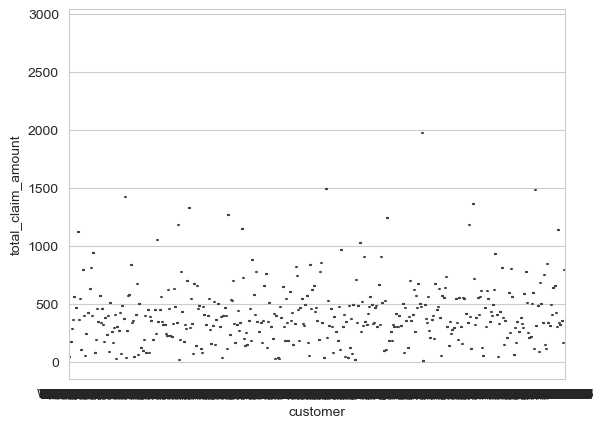

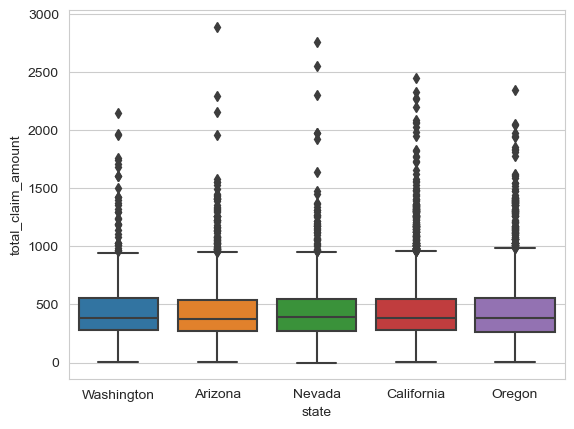

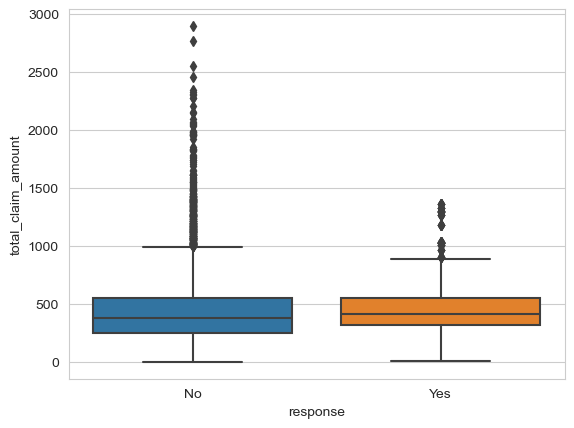

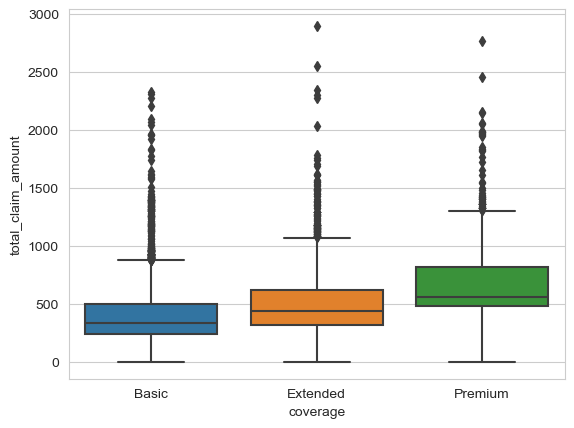

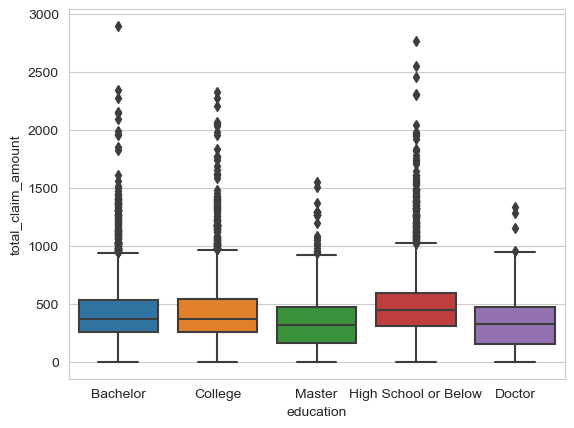

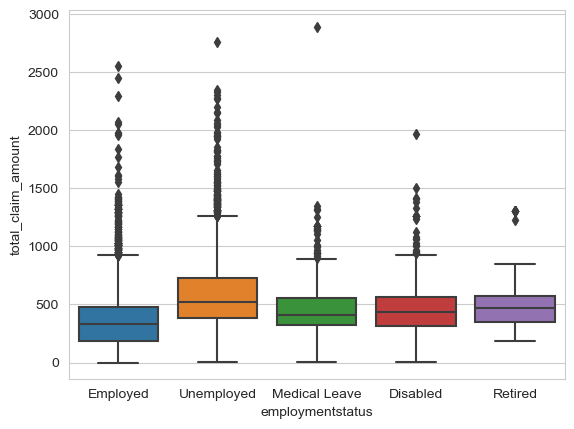

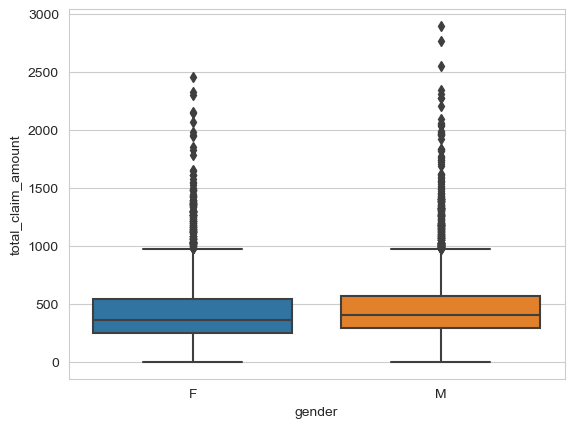

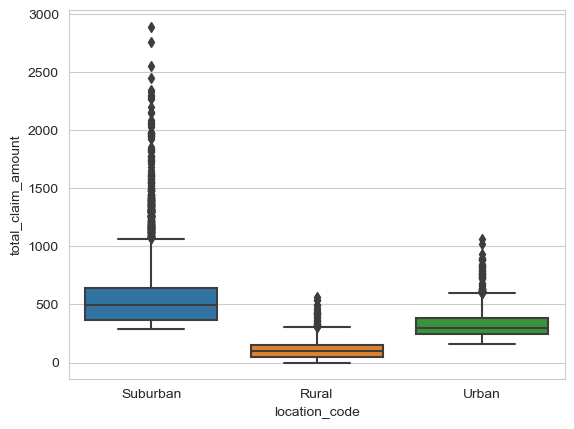

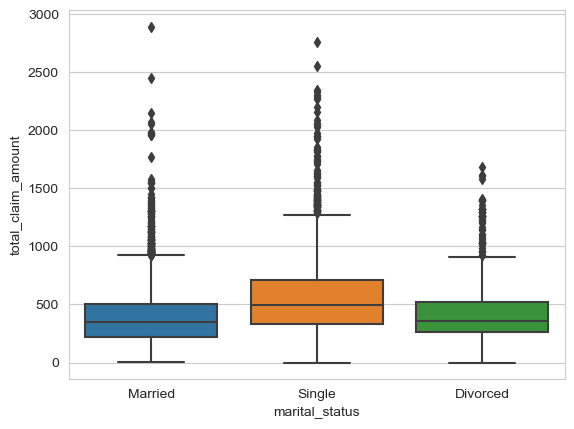

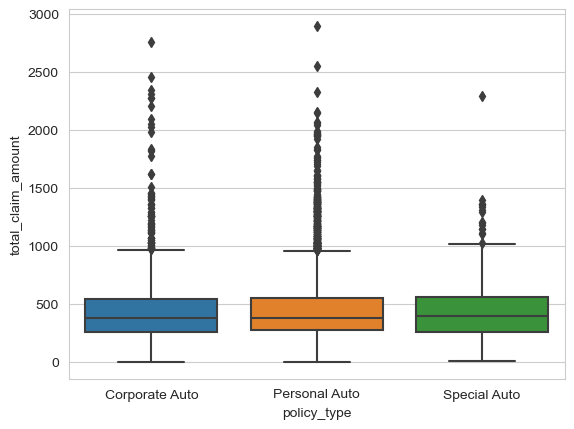

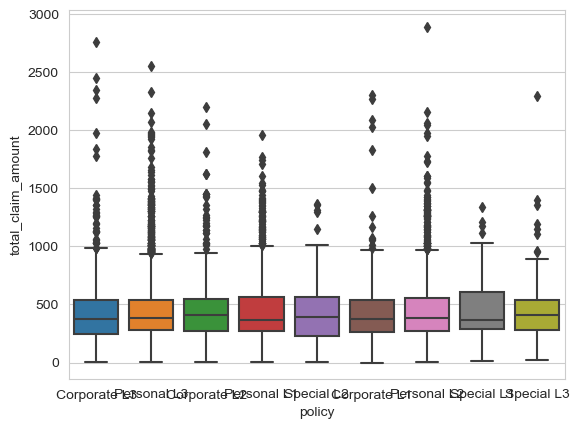

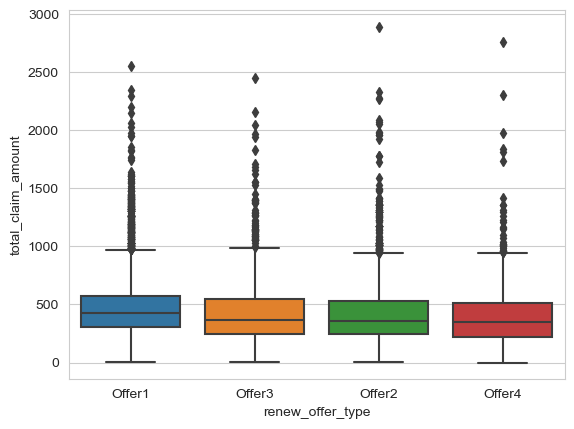

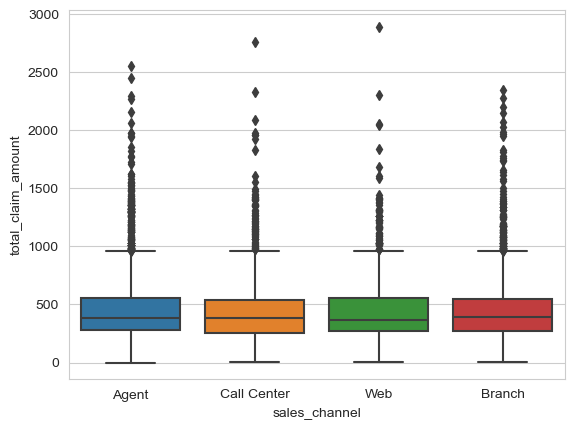

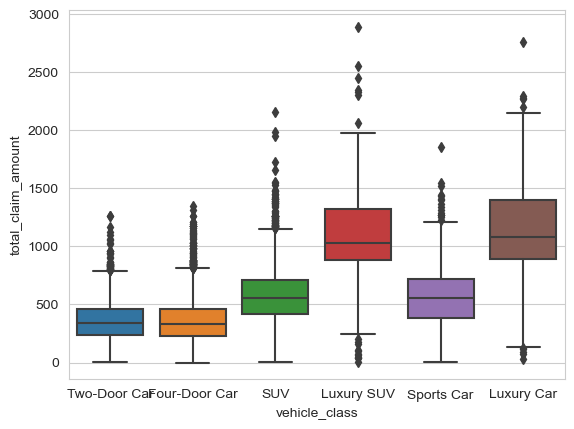

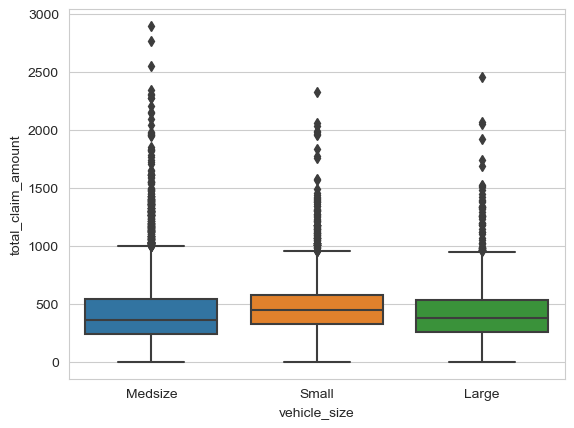

In [14]:
for col in categorical.columns:
    sns.boxplot(x=col, y='total_claim_amount', data=data)
    plt.show()

In [15]:
columns_to_drop = ['state', 'response', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'sales_channel', 'vehicle_size']
categorical_new = categorical.drop(columns=columns_to_drop)
categorical_new.head()

,customer,coverage,policy_type,policy,renew_offer_type,vehicle_class
0,BU79786,Basic,Corporate Auto,Corporate L3,Offer1,Two-Door Car
1,QZ44356,Extended,Personal Auto,Personal L3,Offer3,Four-Door Car
2,AI49188,Premium,Personal Auto,Personal L3,Offer1,Two-Door Car
3,WW63253,Basic,Corporate Auto,Corporate L2,Offer1,SUV
4,HB64268,Basic,Personal Auto,Personal L1,Offer1,Four-Door Car


### 6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [16]:
for col in categorical_new.columns:
    print("Value counts for column '{}':".format(col))
    print(categorical_new[col].value_counts())
    print("--------------------")

Value counts for column 'customer':
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
--------------------
Value counts for column 'coverage':
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
--------------------
Value counts for column 'policy_type':
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
--------------------
Value counts for column 'policy':
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64
--------------------
Value counts for column 'renew_offer_type':
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64
--------------------
Value counts for column 'v

<font color=purple>I don't dsee meaingless values that need to be replaced.Everything is clean and different categories have sufficient amount of data so I don;t see a need for binning</font>



# <font color=Blue>LAB Feature extraction</font>


### 1. Open the categoricals variable we created before.

In [17]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2.Plot all the categorical variables with the proper plot. What can you see?

Already did in exercise 5 of prevoius lab which is included in this notbook.

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

As mentioned in the previous lab:

<font color=purple>state, response: It doesn't affect the customer lifetime value significantly. So we can drop them. coverage: Logically customers with premium or extended coverage have higher customer lifetime value. education, employment, gender, location code, marital status, sales channel, vehicle size : not a highe correlation with customer lifetime value. we can drop them. Policy type, policy, renew offer type, vehicle class: They have some level of correlation with customer lifetime value so we'll keep them.</font>

In [18]:
# have done the below already:
#columns_to_drop = ['state', 'response', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'sales_channel', 'vehicle_size']
#categorical_new = categorical.drop(columns=columns_to_drop)
categorical_new.head()

,customer,coverage,policy_type,policy,renew_offer_type,vehicle_class
0,BU79786,Basic,Corporate Auto,Corporate L3,Offer1,Two-Door Car
1,QZ44356,Extended,Personal Auto,Personal L3,Offer3,Four-Door Car
2,AI49188,Premium,Personal Auto,Personal L3,Offer1,Two-Door Car
3,WW63253,Basic,Corporate Auto,Corporate L2,Offer1,SUV
4,HB64268,Basic,Personal Auto,Personal L1,Offer1,Four-Door Car


### 4. Plot time variable. Can you extract something from it?

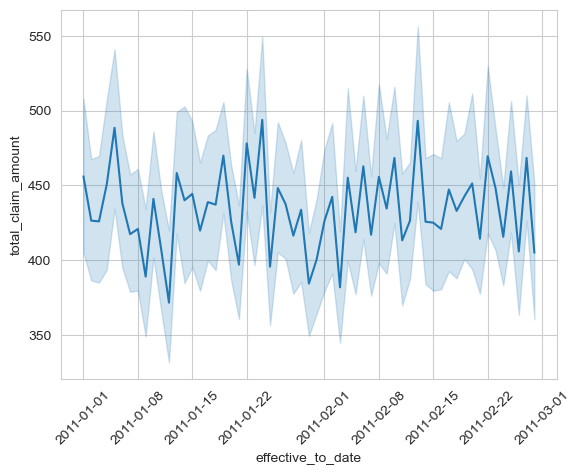

In [22]:
sns.lineplot(data = data, x = "effective_to_date", y = "total_claim_amount" )
plt.xticks(rotation=45)
plt.show()

In [27]:
import plotly.express as px


fig = px.line(data, x='effective_to_date', y='total_claim_amount')
fig.update_xaxes(title='effective_to_date')
fig.update_yaxes(title='total_claim_amount')
fig.update_layout(title='Time Variable Trend')
fig.show()

### Why did my plot turn in to this mess?

In [29]:
data['effective_month'] = data['effective_to_date'].dt.strftime('%b')
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Feb
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Jan
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Feb
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Jan
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Feb


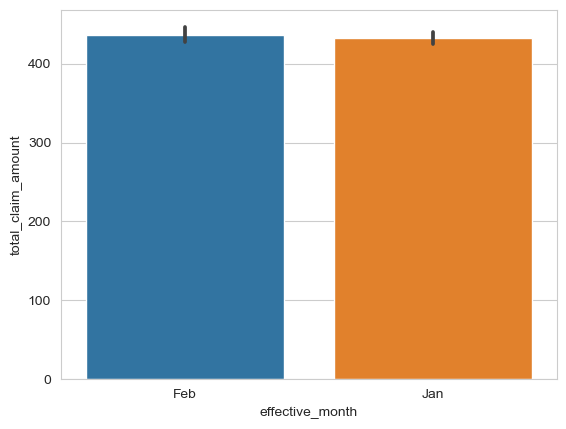

In [33]:
sns.barplot(x='effective_month', y='total_claim_amount', data=data)
plt.show()

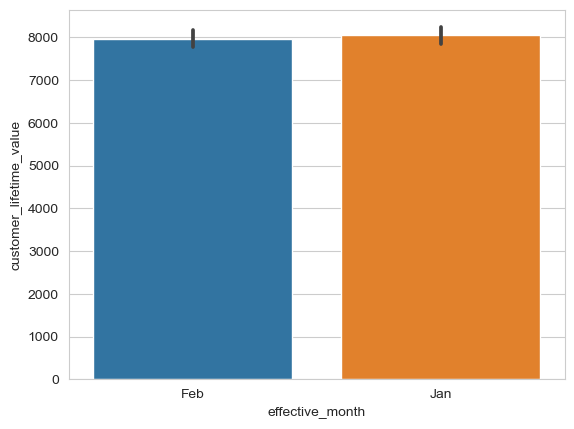

In [34]:
sns.barplot(x='effective_month', y='customer_lifetime_value', data=data)
plt.show()

<font color=purple>Month or probabaly in general the time captured in this data set doesn't affect the total_claim_amount or the customer_lifetime_value</font>